In [37]:
library(ggplot2)
library(reshape2)
library(dplyr)
library(ggpubr)
library('ggplot2')
library('reshape2')
library('ggpubr')
library(glmnet)
library(doMC)
library(survival)
library(data.table)
library(mltools)
library(CoxBoost)
library(randomForestSRC)
library(CoxHD)
library(Hmisc)
library(gridExtra)
library("survminer")
library(dplyr)
library(stringr)
source("../../../src/tools.R")
options(repr.plot.res        = 100, # set a medium-definition resolution for the jupyter notebooks plots (DPI)
        repr.matrix.max.rows = 250, # set the maximum number of rows displayed
        repr.matrix.max.cols = 250)

In [28]:
SVM <- read.table("SVM_add_eln_comp.csv",sep=",",header=T)
df <- cbind(read.table("eln_comp_merged.tsv"),SVM=SVM$eln_comp_chr_merged)
df$model <- "ELN With Components"
tmp <- cbind(read.table("eln.tsv"),SVM=SVM$eln)
tmp$model <- "ELN Recommendation 2017"
df_comparison <- rbind(df,tmp)
df_comparison <- melt(df_comparison,id='model')
df_comparison $title <- "Comparison"

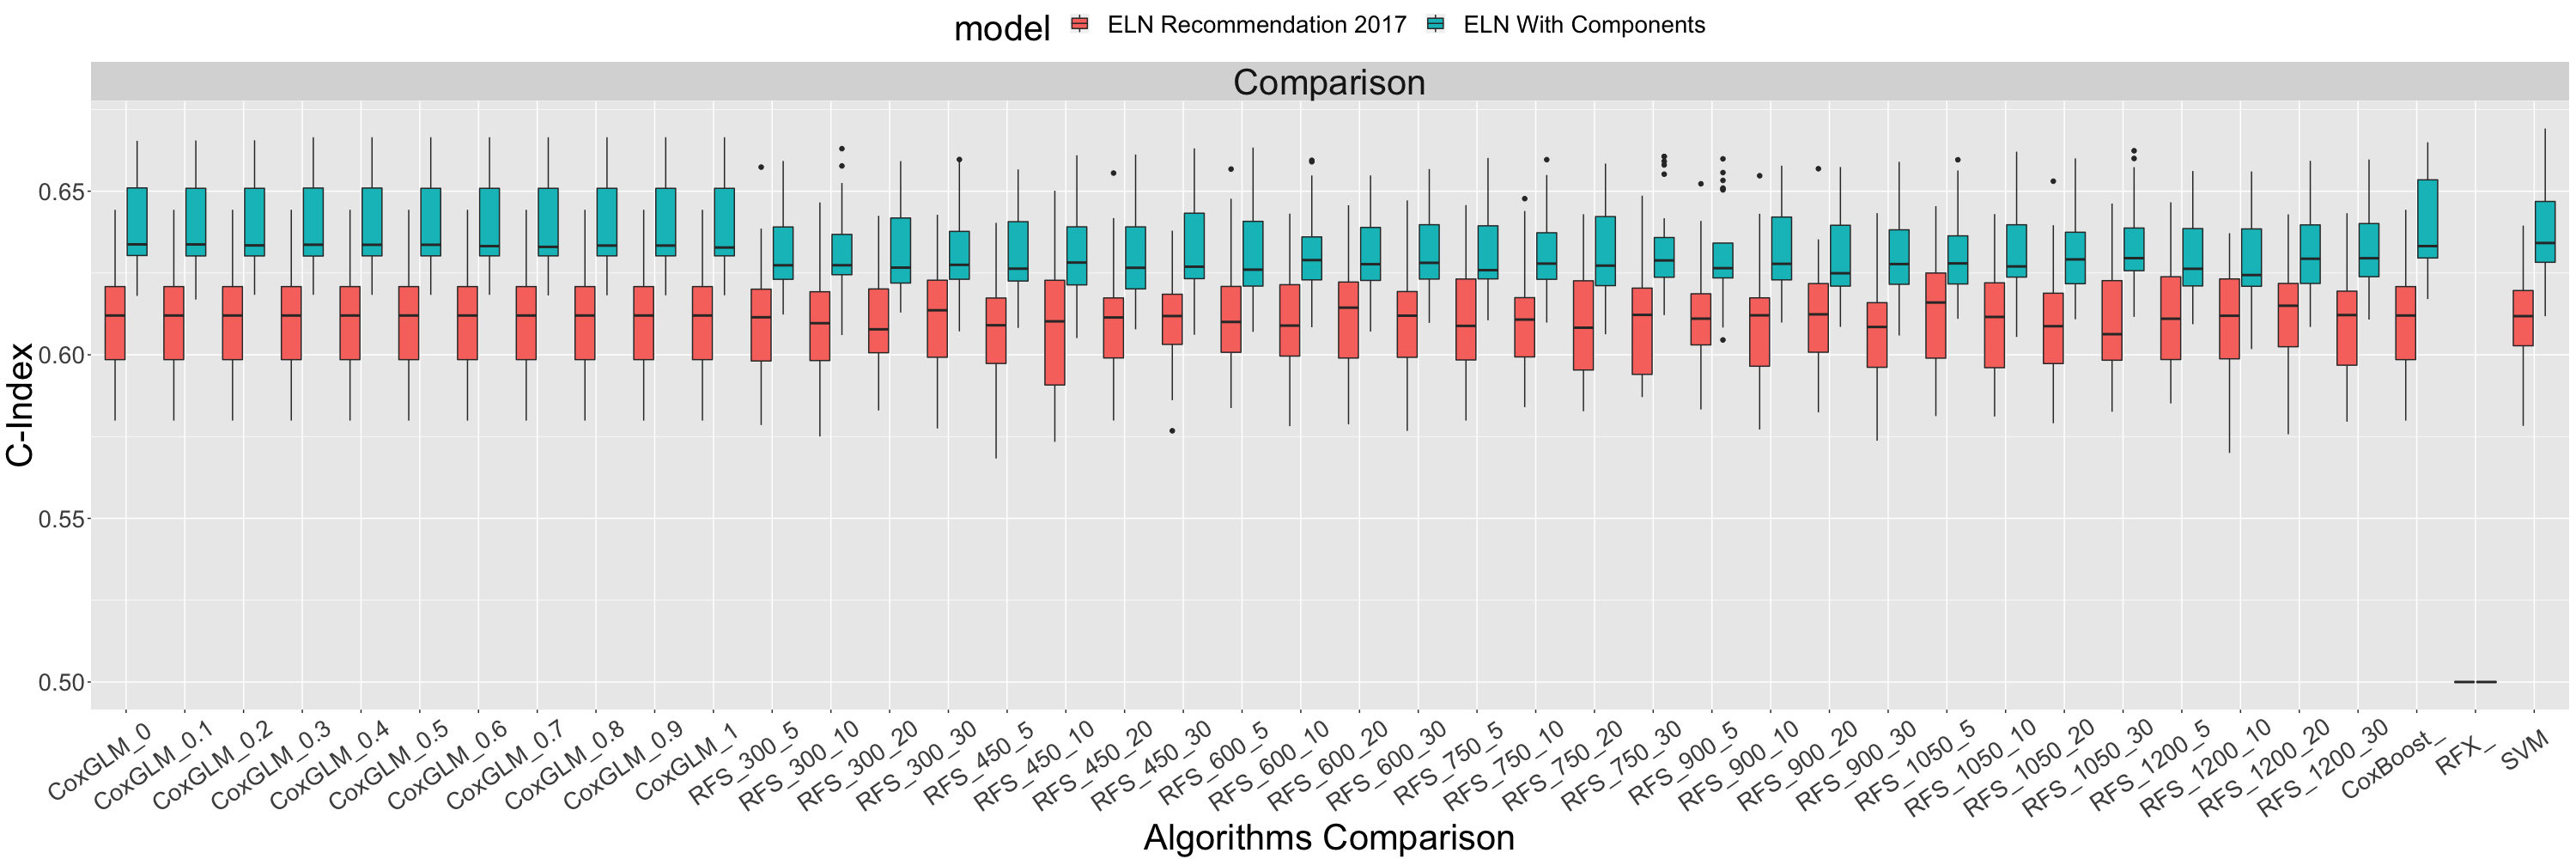

In [29]:
set_notebook_plot_size(30,10)
ggplot(df_comparison,aes(x=variable,y=value)) + geom_boxplot(aes(fill = model), notch=F)+
theme(strip.text = element_text(size=30),legend.position="top",axis.text.x = element_text(angle = 35, hjust = 0.8,vjust=0.8,size=20),axis.text.y = element_text(size = 20),
     axis.title.x=element_text(size=30),axis.title.y=element_text(size=30),legend.title=element_text(size=30),legend.text=element_text(size=20)) +
ylab("C-Index") + xlab("Algorithms Comparison") + facet_wrap( ~ title) #+ stat_compare_means(paired = T)

# MISCELLANEOUS ELN COMPARISONS

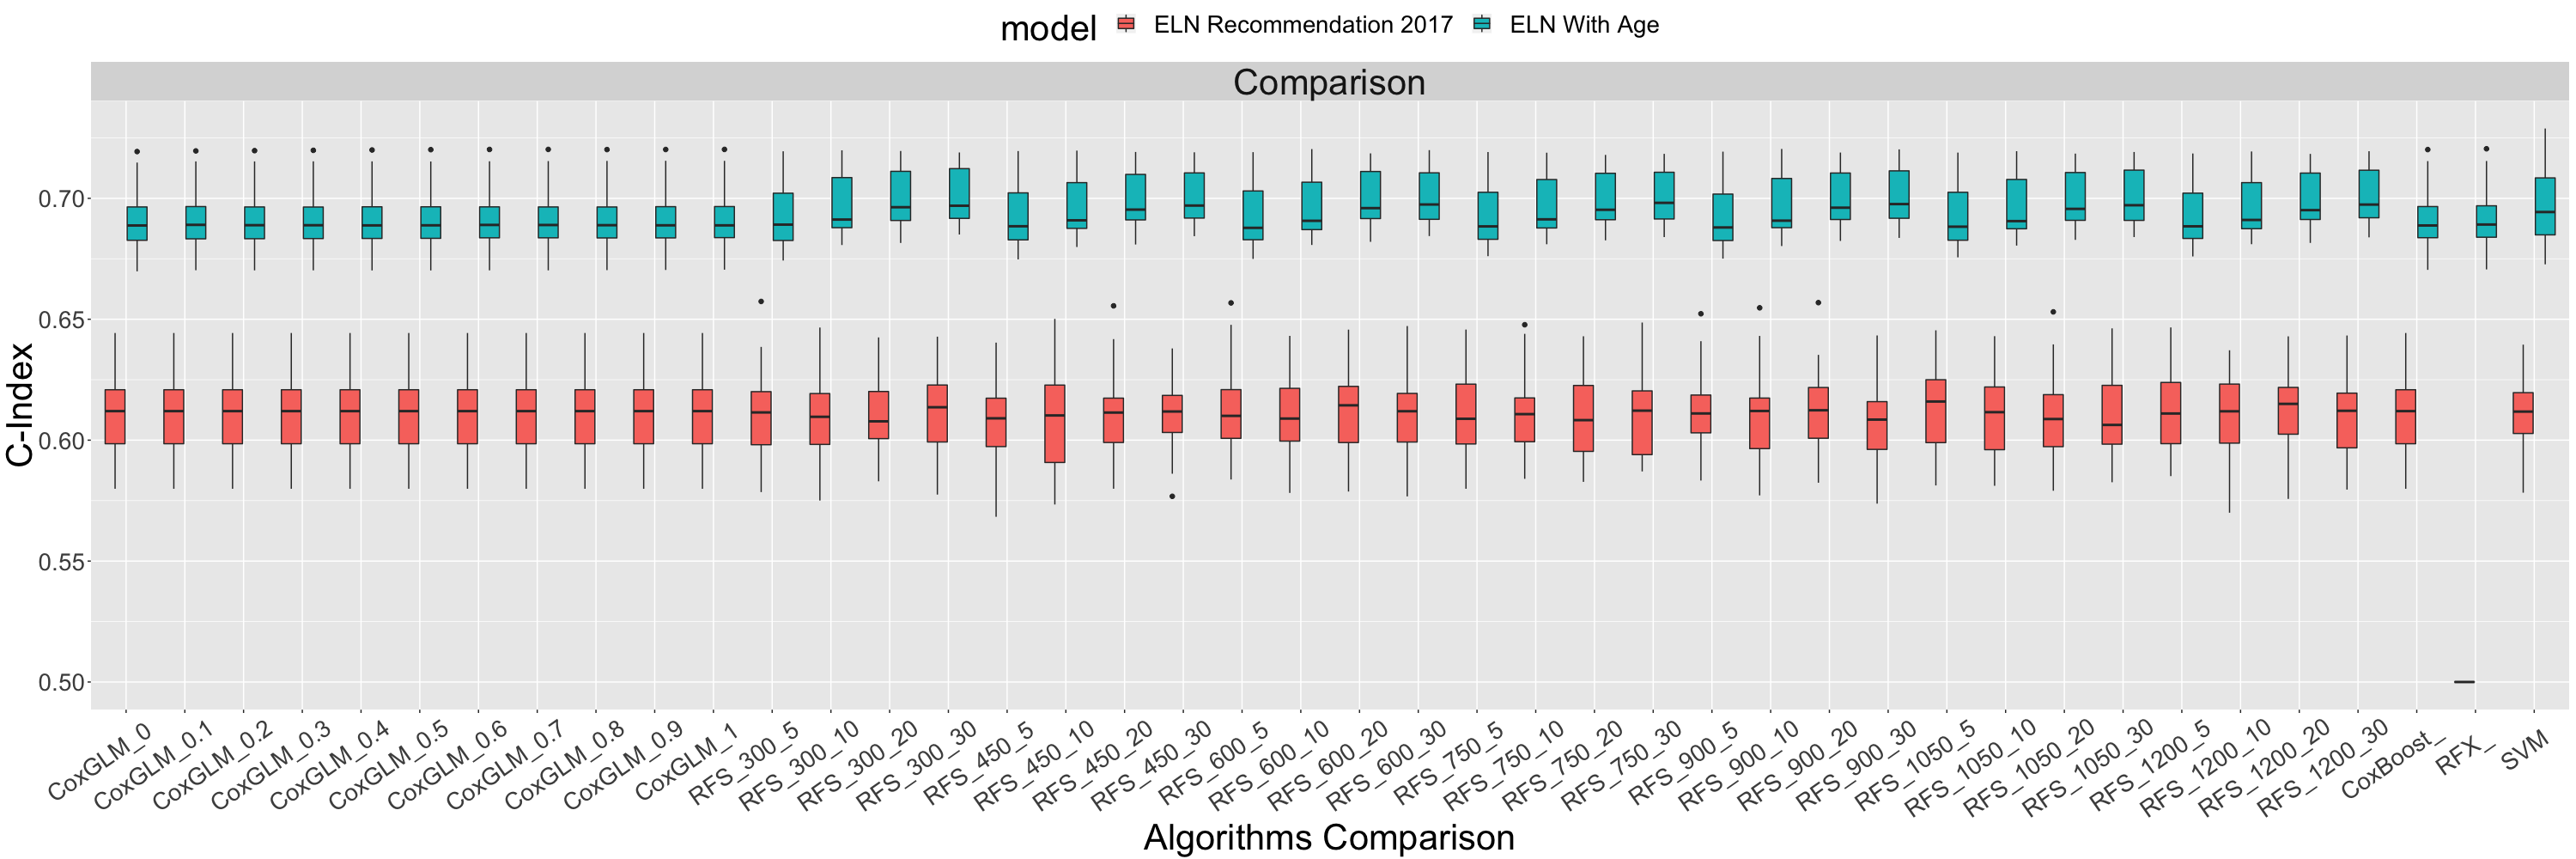

In [31]:
df <- cbind(read.table("eln_age.tsv"),SVM=SVM$eln_age)
df$model <- "ELN With Age"
tmp <- cbind(read.table("eln.tsv"),SVM=SVM$eln)
tmp$model <- "ELN Recommendation 2017"
df_comparison <- rbind(df,tmp)
df_comparison <- melt(df_comparison,id='model')
df_comparison $title <- "Comparison"
set_notebook_plot_size(30,10)
ggplot(df_comparison,aes(x=variable,y=value)) + geom_boxplot(aes(fill = model), notch=F)+
theme(strip.text = element_text(size=30),legend.position="top",axis.text.x = element_text(angle = 35, hjust = 0.8,vjust=0.8,size=20),axis.text.y = element_text(size = 20),
     axis.title.x=element_text(size=30),axis.title.y=element_text(size=30),legend.title=element_text(size=30),legend.text=element_text(size=20)) +
ylab("C-Index") + xlab("Algorithms Comparison") + facet_wrap( ~ title) #+ stat_compare_means(paired = T)

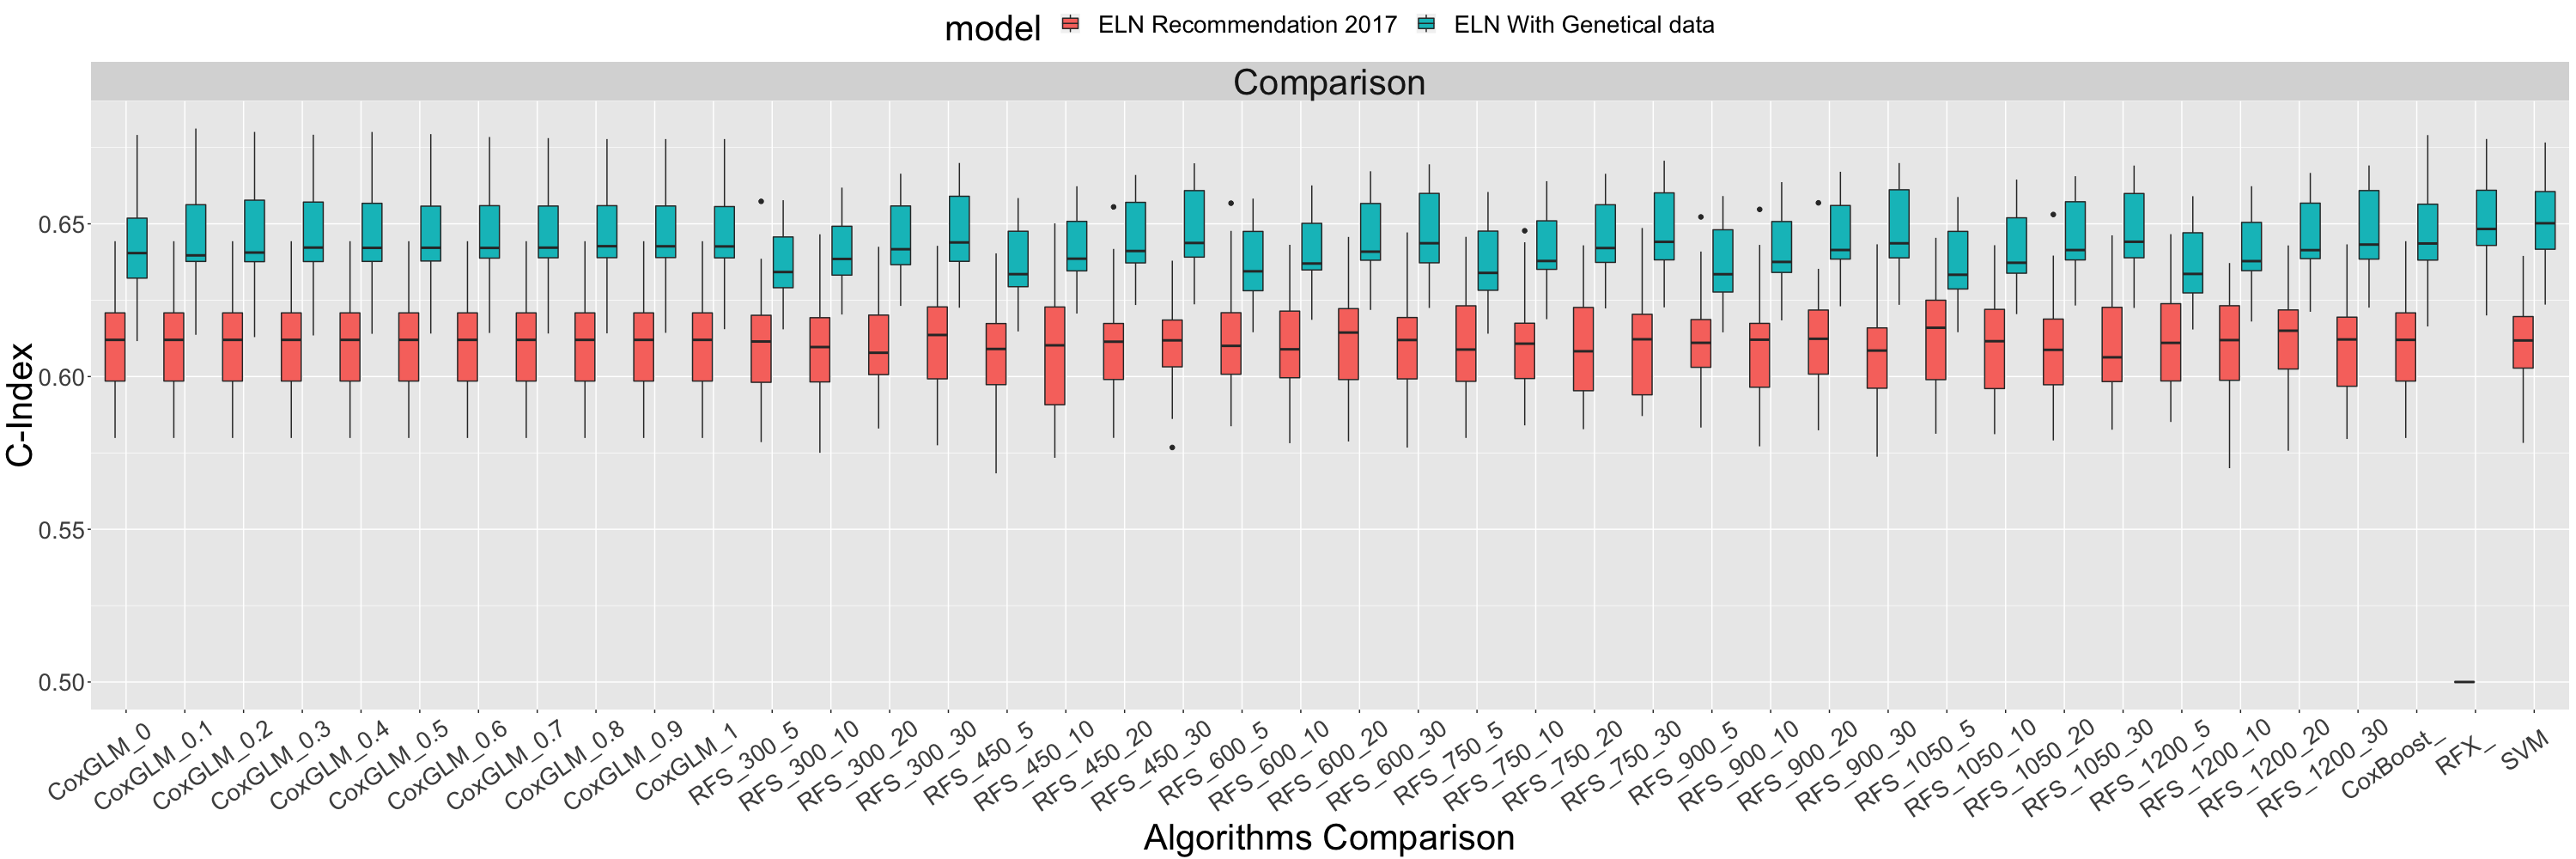

In [33]:
df <- cbind(read.table("eln_gen.tsv"),SVM=SVM$eln_gen)
df$model <- "ELN With Genetical data"
tmp <- cbind(read.table("eln.tsv"),SVM=SVM$eln)
tmp$model <- "ELN Recommendation 2017"
df_comparison <- rbind(df,tmp)
df_comparison <- melt(df_comparison,id='model')
df_comparison $title <- "Comparison"
set_notebook_plot_size(30,10)
ggplot(df_comparison,aes(x=variable,y=value)) + geom_boxplot(aes(fill = model), notch=F)+
theme(strip.text = element_text(size=30),legend.position="top",axis.text.x = element_text(angle = 35, hjust = 0.8,vjust=0.8,size=20),axis.text.y = element_text(size = 20),
     axis.title.x=element_text(size=30),axis.title.y=element_text(size=30),legend.title=element_text(size=30),legend.text=element_text(size=20)) +
ylab("C-Index") + xlab("Algorithms Comparison") + facet_wrap( ~ title) #+ stat_compare_means(paired = T)


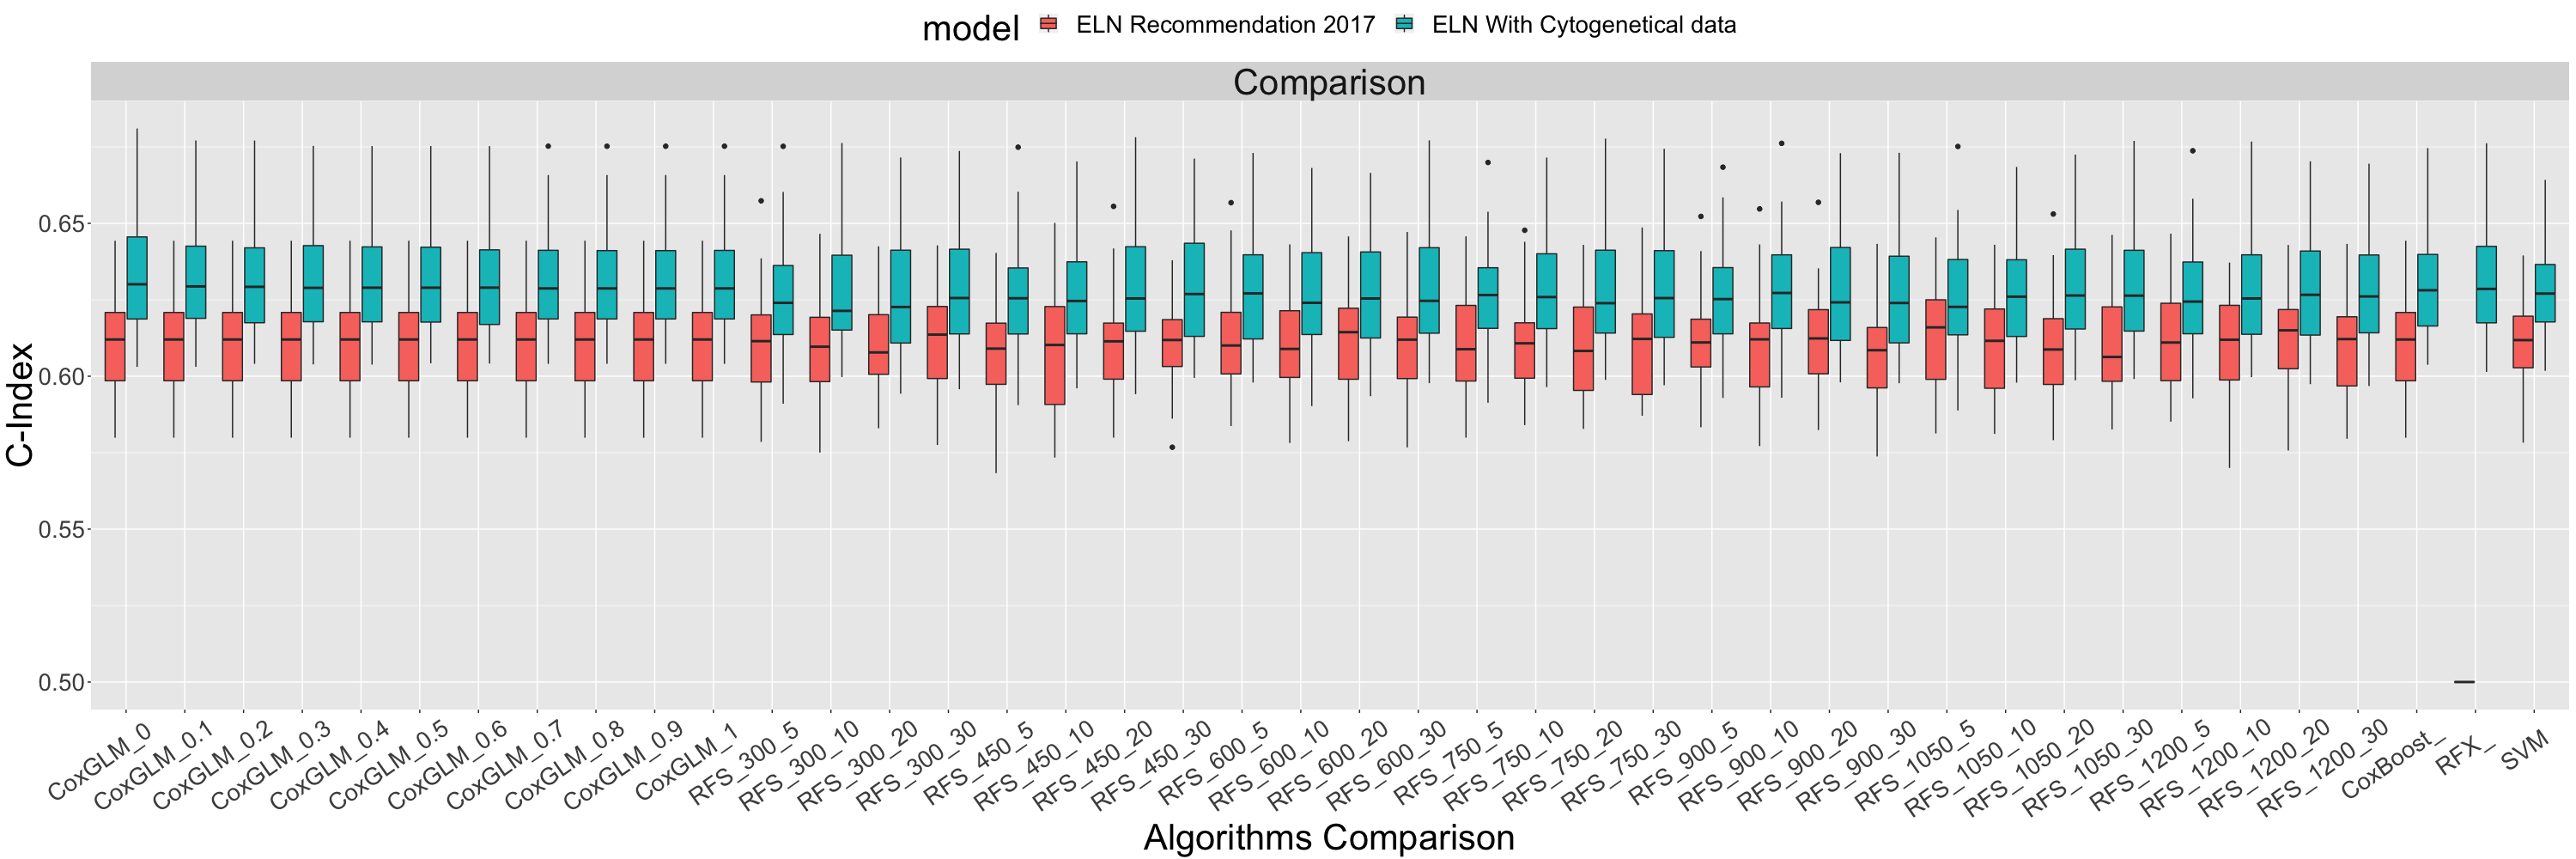

In [34]:
df <- cbind(read.table("eln_cyto.tsv"),SVM=SVM$eln_cyto)
df$model <- "ELN With Cytogenetical data"
tmp <- cbind(read.table("eln.tsv"),SVM=SVM$eln)
tmp$model <- "ELN Recommendation 2017"
df_comparison <- rbind(df,tmp)
df_comparison <- melt(df_comparison,id='model')
df_comparison $title <- "Comparison"
set_notebook_plot_size(30,10)
ggplot(df_comparison,aes(x=variable,y=value)) + geom_boxplot(aes(fill = model), notch=F)+
theme(strip.text = element_text(size=30),legend.position="top",axis.text.x = element_text(angle = 35, hjust = 0.8,vjust=0.8,size=20),axis.text.y = element_text(size = 20),
     axis.title.x=element_text(size=30),axis.title.y=element_text(size=30),legend.title=element_text(size=30),legend.text=element_text(size=20)) +
ylab("C-Index") + xlab("Algorithms Comparison") + facet_wrap( ~ title) #+ stat_compare_means(paired = T)

In [38]:
df_bootstrap <- NULL
for (l in list.files('../InitialPrognosis/comparison_dataframes/')){
    if (grepl("_bootstrap",l)){
        if(grepl("_bootstrap_SVM",l)){
            df_tmp <- read.table(paste('../InitialPrognosis/comparison_dataframes/',l,sep=""),sep=',',header=T)
            df_tmp <- df_tmp[,-1]
            df_tmp <- df_tmp[,c(2,1,3)]
        } else {
            df_tmp <- read.table(paste('../InitialPrognosis/comparison_dataframes/',l,sep=""))
        }
        colnames(df_tmp) <- c("feature","sum_coef","num_selected")
        df_tmp$model_algo <- str_sub(l, 1, str_length(l)-4)
        df_bootstrap <- rbind(df_bootstrap,df_tmp)   
    }
}

In [39]:
eln_comp <- df_bootstrap[startsWith(df_bootstrap$model_algo,"eln_comp_bootstrap"),]
eln_comp <- eln_comp[,c('feature','sum_coef','num_selected')] %>% group_by(feature) %>% summarize_all(sum)
eln_comp$proportion_selected <- eln_comp$num_selected /7

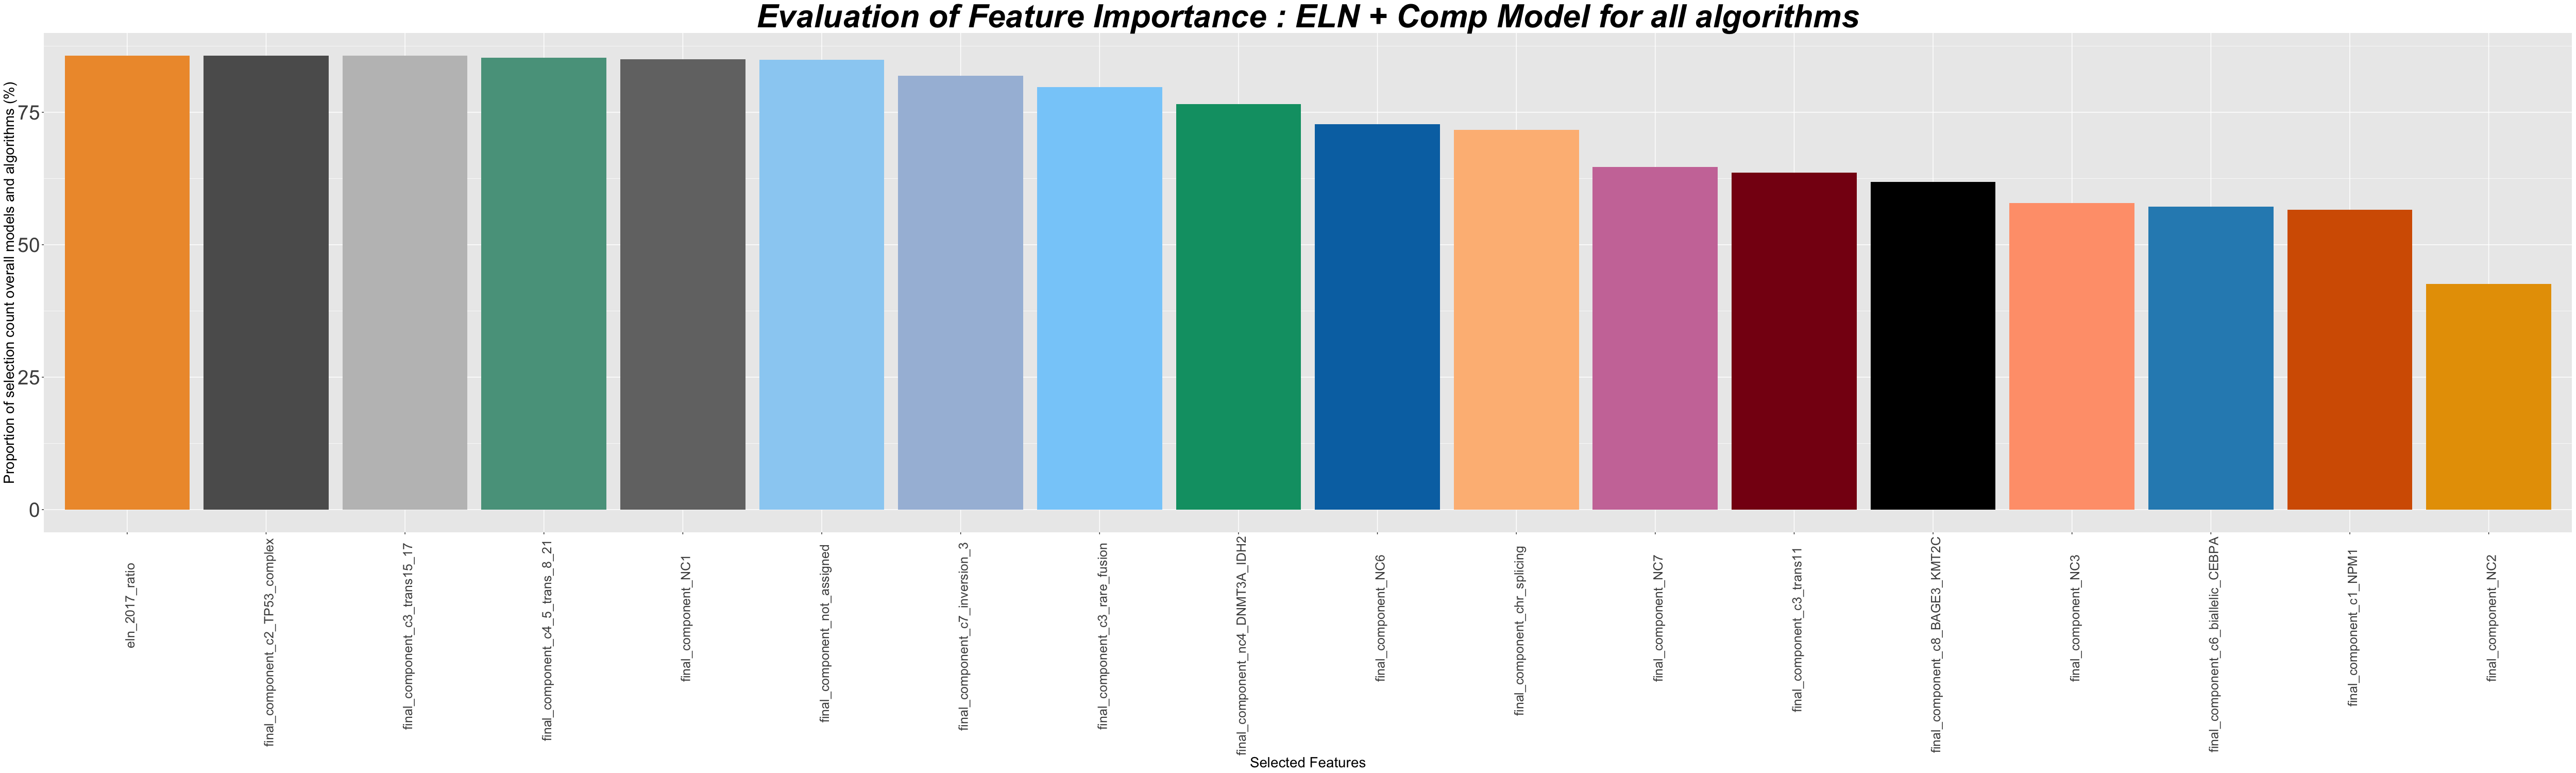

In [40]:
set_notebook_plot_size(50,15)
cols <- c("eln_2017_ratio" = "#EE9937", "final_component_c2_TP53_complex" = "#5C5C5C", "final_component_c3_trans11" = "#870C14", "final_component_c3_trans15_17" = "#BFBFBF",
         "final_component_c4_5_trans_8_21" = "#59A08B", "final_component_c6_biallelic_CEBPA" = "#2b8cbe", "final_component_c7_inversion_3" = "#a6bddb", "final_component_chr_splicing" = "#fdbb84",
         "final_component_NC1" = "grey45", "final_component_NC2" = "#e79f00", "final_component_nc4_DNMT3A_IDH2" = "#009E73", "final_component_NC6" = "#0072B2",
         "final_component_NC7" = "#CC79A7", "final_component_not_assigned" = "#9ad0f3", "final_component_c1_NPM1" = "#D55E00", "final_component_c3_rare_fusion" = "lightskyblue",
         "final_component_c8_BAGE3_KMT2C" = "#000000", "final_component_NC3" = "lightsalmon")
ggplot(na.omit(eln_comp),aes(x=reorder(feature,-proportion_selected),y=proportion_selected))+geom_bar(stat = "identity", aes(fill = reorder(feature,-proportion_selected)))+
theme(plot.title = element_text( size=45, face="bold.italic",hjust=0.5),legend.position="none",axis.text.x = element_text(angle = 90, hjust = 0.8,vjust=0.8,size=18),axis.text.y=element_text(size=28),axis.title.y = element_text(size = 20),axis.title.x = element_text(size = 20))+xlab("Selected Features") +
ylab("Proportion of selection count overall models and algorithms (%)") + ggtitle("Evaluation of Feature Importance : ELN + Comp Model for all algorithms")+scale_fill_manual(values = cols)

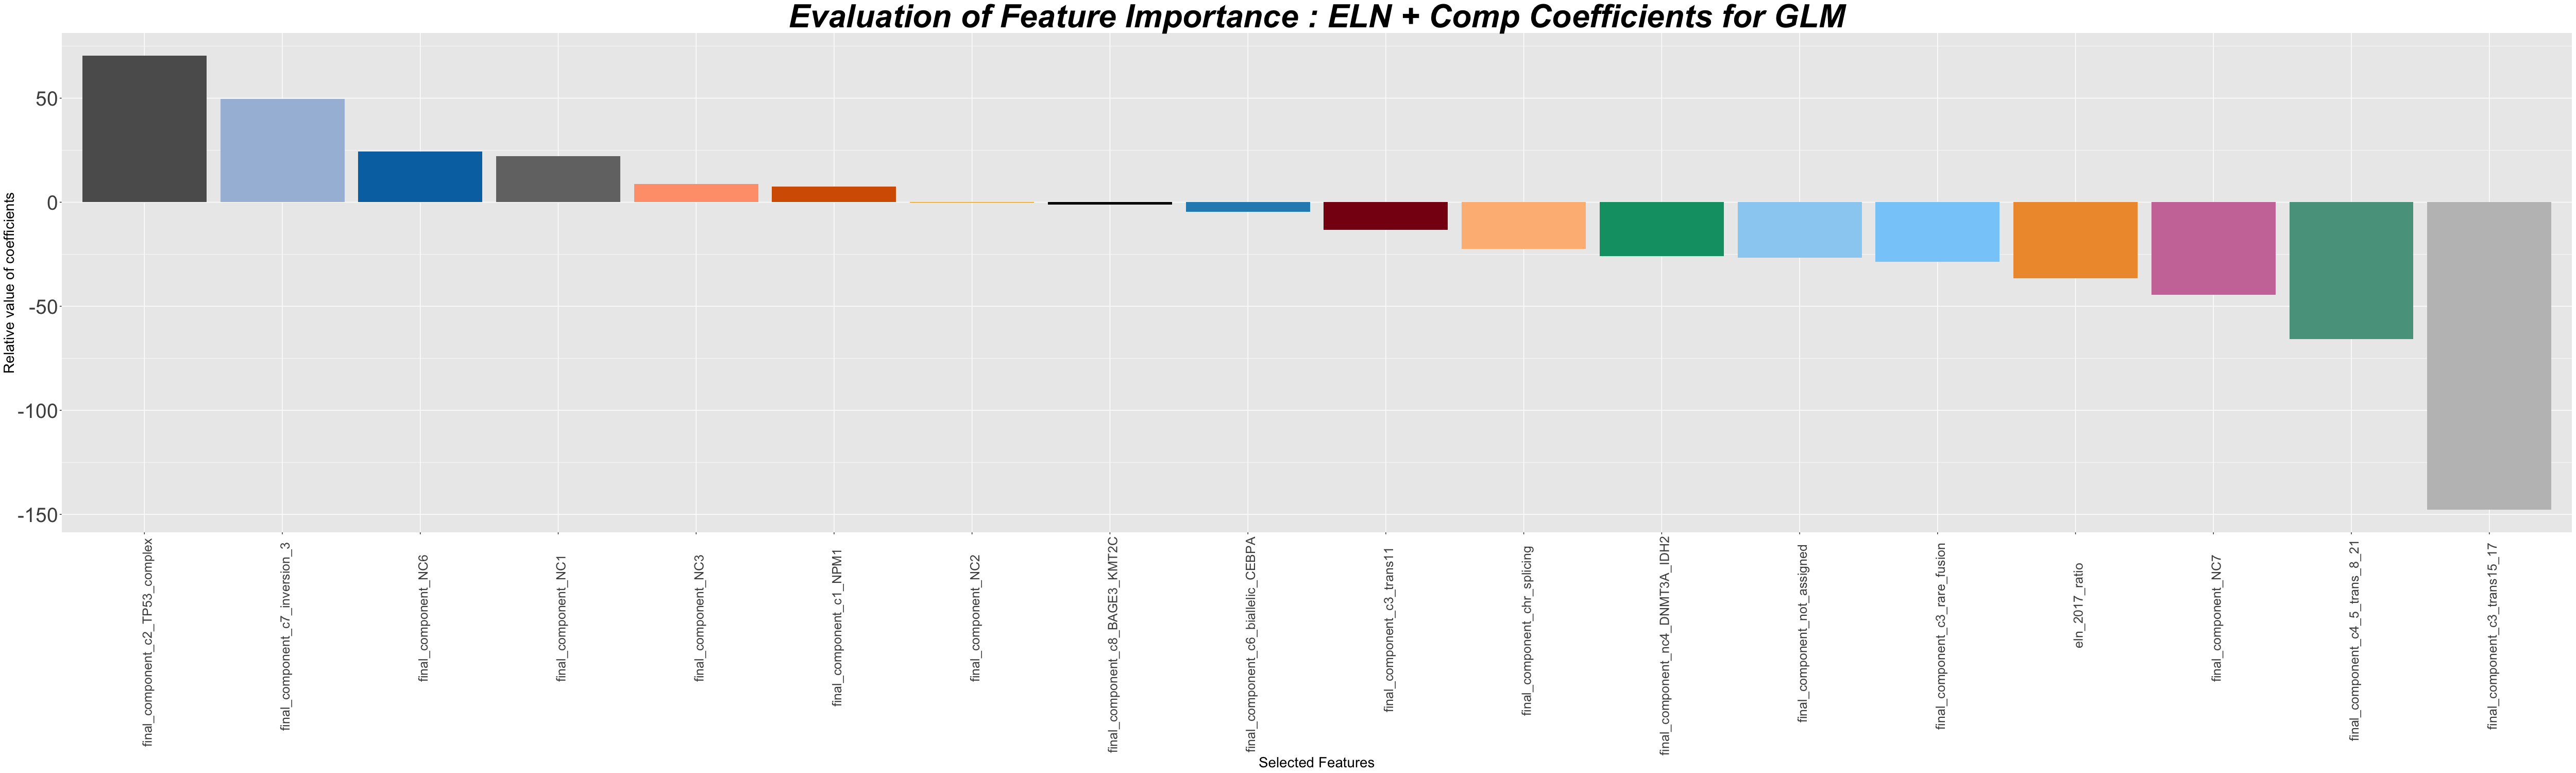

In [41]:
eln_comp_glm <- df_bootstrap[startsWith(df_bootstrap$model_algo,"eln_comp_bootstrap_glm"),]
eln_comp_glm <- eln_comp_glm[,c('feature','sum_coef','num_selected')] %>% group_by(feature) %>% summarize_all(sum)
eln_comp_glm$proportion_coefficients <- eln_comp_glm$sum_coef /3
set_notebook_plot_size(50,15)
ggplot(na.omit(eln_comp_glm),aes(x=reorder(feature,-proportion_coefficients),y=proportion_coefficients))+geom_bar(stat = "identity", aes(fill = reorder(feature,-proportion_coefficients)))+
theme(plot.title = element_text( size=45, face="bold.italic",hjust=0.5),legend.position="none",axis.text.x = element_text(angle = 90, hjust = 0.8,vjust=0.8,size=18),axis.text.y=element_text(size=28),axis.title.y = element_text(size = 20),axis.title.x = element_text(size = 20))+xlab("Selected Features") +
ylab("Relative value of coefficients") + ggtitle("Evaluation of Feature Importance : ELN + Comp Coefficients for GLM")+scale_fill_manual(values = cols)